# Starting Out With Bokeh

## One Variable Plotting

In [3]:
# Pandas for data manipulation,
import pandas as pd
import numpy as np

## Basic Glyphs

In [4]:

# bokeh basics
from bokeh.plotting import figure
from bokeh.io import show, output_notebook

# Create a blank figure with labels
p = figure(plot_width = 600, plot_height = 600, 
           title = 'Example Glyphs',
           x_axis_label = 'X', y_axis_label = 'Y')

squares_x = [1, 3, 4, 5, 8]
squares_y = [8, 7, 3, 1, 10]

circles_x = [9, 12, 4, 3, 15]
circles_y = [8, 4, 11, 6, 10]

# Squares glyph
p.square(squares_x, squares_y, size = 12, color = 'navy', alpha = 0.6)

# Circle glyph
p.circle(circles_x, circles_y, size = 12, color = 'red')


# Set to output the plot in the notebook
output_notebook()

# Show the plot
show(p)

Loading BokehJS ...

## Data Inspection

In [5]:
flight = pd.read_csv('../../data/flights.csv', index_col=0)
flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


### Summary Statistics
We are going to focus on a single variable, in this case the arrival delay in minutes. Before we get into plotting, we will want to take a look at the summary statistics for the arrival delay.

In [6]:
flight['arr_delay'].describe()

count    327346.000000
mean          6.895377
std          44.633292
min         -86.000000
25%         -17.000000
50%          -5.000000
75%          14.000000
max        1272.000000
Name: arr_delay, dtype: float64

In [7]:
# Remove na values from flight data
flights = flight.dropna()

## Histogram
First graph will be simple histogram of arrival delay, with all airlines on the same plot

### Data for plotting

In [8]:
# Bins will be five minutes in width, so number of bins is 180/5
# Limit delays to [-60, +120] minutes using the range
arr_hist, edges = np.histogram(flights['arr_delay'], 
                               bins = int(180/5), 
                               range = [-60, 120])

# Put the information in a dataframe
delays = pd.DataFrame({'flights': arr_hist, 
                       'left': edges[:-1], 
                       'right': edges[1:]})

In [9]:
delays.head()

,flights,left,right
0,276,-60.0,-55.0
1,636,-55.0,-50.0
2,1394,-50.0,-45.0
3,2820,-45.0,-40.0
4,5339,-40.0,-35.0


In [10]:
# Create the blank plot
p = figure(plot_height = 600, plot_width = 600, 
           title = 'Histogram of Arrival Delays',
          x_axis_label = 'Delay (min)]', 
           y_axis_label = 'Number of Flights')

# Add a quad glyph
p.quad(bottom=0, top=delays['flights'], 
       left=delays['left'], right=delays['right'], 
       fill_color='red', line_color='black')

# Show the plot
show(p)

## matplotlib equivalent

In [11]:
import matplotlib.pyplot as plt
plt.hist(flights['arr_delay'], bins = int(180/5), range = (-60, 120));
plt.xlabel('Delay (min)'); plt.ylabel('Number of Flights')
plt.title('Histogram of Arrival Delays')
plt.show()

<Figure size 640x480 with 1 Axes>

## Add basic styling function

In [12]:
# Style function that takes in a plot
def style(p):
    # Title 
    p.title.align = 'center'
    p.title.text_font_size = '20pt'
    p.title.text_font = 'serif'
    
    # Axis titles
    p.xaxis.axis_label_text_font_size = '14pt'
    p.xaxis.axis_label_text_font_style = 'bold'
    p.yaxis.axis_label_text_font_size = '14pt'
    p.yaxis.axis_label_text_font_style = 'bold'
    
    # Tick labels
    p.xaxis.major_label_text_font_size = '12pt'
    p.yaxis.major_label_text_font_size = '12pt'
    
    return p

# Add Aesthetics
styled_p = style(p)

# Show plot
show(styled_p)

## Adding Interactivity
There are easier ways to create a basic histogram in Python, using matplotlib, but Bokeh provides ways to interact with the data

### **Passive Interactions**
(inspectors) are actions which do not alter the data displayed. e.g. the **HoverTool**

### ColumnDataSource

In [13]:
# Import the ColumnDataSource class
from bokeh.models import ColumnDataSource

In [14]:
# Formatted columns for Hover Tooltips
delays['f_flights'] = ['%d flights' % count for count in delays['flights']]
delays['f_interval'] = ['%d to %d minutes' % (left, right) for left, right in zip(delays['left'], delays['right'])]

delays.head()

,flights,left,right,f_flights,f_interval
0,276,-60.0,-55.0,276 flights,-60 to -55 minutes
1,636,-55.0,-50.0,636 flights,-55 to -50 minutes
2,1394,-50.0,-45.0,1394 flights,-50 to -45 minutes
3,2820,-45.0,-40.0,2820 flights,-45 to -40 minutes
4,5339,-40.0,-35.0,5339 flights,-40 to -35 minutes


In [15]:
# Convert to column data source
src = ColumnDataSource(delays)
src.data.keys()

dict_keys(['f_flights', 'left', 'f_interval', 'flights', 'right', 'index'])

### Add in Tooltips on Hover

In [16]:
# Import the hover tool class
from bokeh.models import HoverTool

In [17]:
# Create the blank plot
p = figure(plot_height = 600, plot_width = 600, 
           title = 'Histogram of Arrival Delays',
          x_axis_label = 'Delay (min)', 
           y_axis_label = 'Number of Flights')

# Add a quad glyph with source this time
p.quad(bottom=0, top='flights', left='left', right='right', source=src,
       fill_color='red', line_color='black', fill_alpha = 0.75,
       hover_fill_alpha = 1.0, hover_fill_color = 'navy')

# Add a hover tool referring to the formatted columns
hover = HoverTool(tooltips = [('Delay', '@f_interval'),
                             ('Num of Flights', '@f_flights')])

# Style the plot
p = style(p)

# Add the hover tool to the graph
p.add_tools(hover)

# Show the plot
show(p)

### Save the Plot

## Delay Proportion by Carrier

In [18]:
# Group by the carrier to find the most common
carrier_nums = flights.groupby('carrier')['year'].count().sort_values(ascending=False)

In [19]:
carrier_nums

carrier
UA    57782
B6    54049
EV    51108
DL    47658
AA    31947
MQ    25037
US    19831
9E    17294
WN    12044
VX     5116
FL     3175
AS      709
F9      681
YV      544
HA      342
OO       29
Name: year, dtype: int64

In [20]:
# Subset to the 8 most common carriers
flights = flights[flights['carrier'].isin(carrier_nums.index[:5])]

# Subset to only [-2, +2] hour delays
flights = flights[(flights['arr_delay'] >= -120) & (flights['arr_delay'] <= 120)]

### Find actual carrier names
and merge them onto flights dataset

In [23]:
# Upload carrier names file
carrier_names = pd.read_csv('../../data/airlines.csv')
carrier_names.head()

,carrier,name
1,9E,Endeavor Air Inc.
2,AA,American Airlines Inc.
3,AS,Alaska Airlines Inc.
4,B6,JetBlue Airways
5,DL,Delta Air Lines Inc.


In [24]:
# Merge carrier_names "on" carrier column in flights data
flights = flights.merge(carrier_names, how = 'left', on = 'carrier')
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


## Making the dataset
The following takes the list of carriers that we want to include, the minimum and maximum delays to be plotter, and the specified bin width in minutes

In [25]:
from bokeh.palettes import Category10_5

by_carrier = pd.DataFrame(columns=['proportion', 'left', 'right', 
                                   'f_proportion', 'f_interval',
                                   'name', 'color'])

# Iterate through all the carriers
for i, carrier_name in enumerate(flights['name'].unique()):
    
    # Subset to the carrier
    subset = flights[flights['name'] == carrier_name]
    
    # Create a histogram with 5 minute bins
    arr_hist, edges = np.histogram(subset['arr_delay'], bins = int(240/5), range = [-120, 120])
    
    # Divide the counts by the total to get a proportion
    arr_df = pd.DataFrame({'proportion': arr_hist / np.sum(arr_hist), 'left': edges[:-1], 'right': edges[1:] })
    
    # Format the proportion 
    arr_df['f_proportion'] = ['%0.5f' % proportion for proportion in arr_df['proportion']]
    
    # Format the interval
    arr_df['f_interval'] = ['%d to %d minutes' % (left, right) for left, right in zip(arr_df['left'], arr_df['right'])]
    
    # Assign the carrier for labels
    arr_df['name'] = carrier_name
    
    # Color each carrier differently
    arr_df['color'] = Category10_5[i]

    # Add to the overall dataframe
    by_carrier = by_carrier.append(arr_df)
    
# Overall dataframe
by_carrier = by_carrier.sort_values(['name', 'left'])

/Users/jonahgolden/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [26]:
by_carrier.head()

,color,f_interval,f_proportion,left,name,proportion,right
0,#ff7f0e,-120 to -115 minutes,0.00000,-120.0,American Airlines Inc.,0.0,-115.0
1,#ff7f0e,-115 to -110 minutes,0.00000,-115.0,American Airlines Inc.,0.0,-110.0
2,#ff7f0e,-110 to -105 minutes,0.00000,-110.0,American Airlines Inc.,0.0,-105.0
3,#ff7f0e,-105 to -100 minutes,0.00000,-105.0,American Airlines Inc.,0.0,-100.0
4,#ff7f0e,-100 to -95 minutes,0.00000,-100.0,American Airlines Inc.,0.0,-95.0


In [27]:
# Make ColumnDataSource date
by_carrier_src = ColumnDataSource(by_carrier)

In [29]:
# Create the figure
p = figure(plot_height = 600, plot_width = 800,
          title = 'Histogram of Airline Delays by Cariier',
          x_axis_label = 'Arrival Delay (min)', y_axis_label = 'Proportion')

# Add the quad glyph with the source by carrier
p.quad(bottom = 0, left = 'left', right = 'right', top = 'proportion',
      fill_color = 'color', legend = 'name', source = by_carrier_src,
      fill_alpha = 0.6, hover_fill_alpha = 1.0, hover_fill_color = 'color')

# Create the hover tool
hover = HoverTool(tooltips = [('Carrier', '@name'),
                              ('Proportion', '@f_proportion'),
                              ('Delay', '@f_interval')],
                 mode = 'vline')

# Add styling and hover tool
styled_p = style(p)
styled_p.add_tools(hover)
show(styled_p)
                              

## Creating Widget Interactions

The first widget we want is a selection box that allows viewers to select airlines to display. This control will be a check box which allows as many selections as desired and is known in Bokeh as a CheckboxGroup. To make the selection tool, we import the CheckboxGroup class and create an instance with two parameters, labels: the values we want displayed next to each box and active: the initial boxes which are checked.

In [36]:
# Available carrier list
available_carriers = list(by_carrier['name'].unique())

# Sort the list in-place (alphabetical order)
available_carriers.sort()

available_carriers

['American Airlines Inc.',
 'Delta Air Lines Inc.',
 'ExpressJet Airlines Inc.',
 'JetBlue Airways',
 'United Air Lines Inc.']

In [38]:
from bokeh.models.widgets import CheckboxGroup

# Create the checkbox selection elements, availaible carriers is a 
# list of all airlines in the data. 
carrier_selection = CheckboxGroup(labels=available_carriers,
                                 active = [0, 1])
carrier_selection

bokeh.models.widgets.groups.CheckboxGroup(
    id='41e3b0ab-4921-43be-8e55-6b65efa25279',
    active=[0, 1],
    callback=None,
    css_classes=[],
    disabled=False,
    height=None,
    inline=False,
    js_event_callbacks={},
    js_property_callbacks={},
    labels=['American Airlines Inc.',
     'Delta Air Lines Inc.',
     'ExpressJet Airlines Inc.',
     'JetBlue Airways',
     'United Air Lines Inc.'],
    name=None,
    sizing_mode='fixed',
    subscribed_events=[],
    tags=[],
    width=None)

In [39]:
# Select the airlines names from the selection values
[carrier_selection.labels[i] for i in carrier_selection.active]

['American Airlines Inc.', 'Delta Air Lines Inc.']

In [40]:
# Update function takes three default parameters
def update(attr, old, new):
    # Get the list of carriers for the graph
    carriers_to_plot = [carrier_selection.labels[i] for i in 
                        carrier_selection.active]
    # Make a new dataset based on the selected carriers and the 
    # make_dataset function defined earlier
    new_src = make_dataset(carriers_to_plot,
                           range_start = -60,
                           range_end = 120,
                           bin_width = 5)
    # Update the source used in the quad glpyhs
    src.data.update(new_src.data)

In [41]:
# Link a change in selected buttons to the update function
carrier_selection.on_change('active', update)

## Lighter Weight Approach Using Seaborn


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/jonahgolden/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


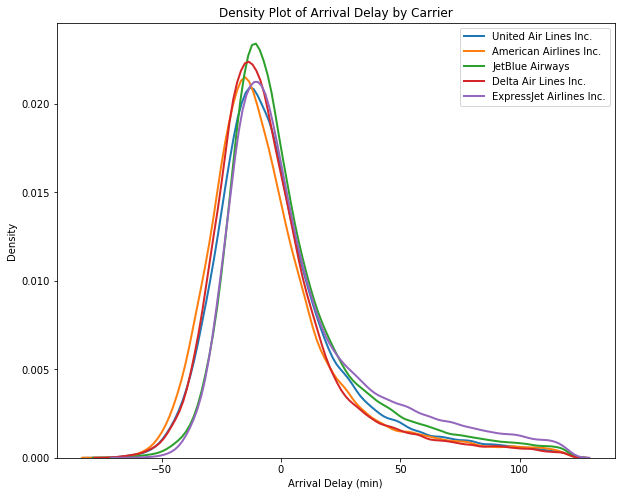

In [31]:
# Create a figure
plt.figure(figsize=(10, 8))

# Iterate through each carrier and make a density plot (kde)
for i, carrier in enumerate(flights['name'].unique()):
    subset = flights[flights['name'] == carrier]
    sns.kdeplot(subset['arr_delay'], color = Category10_5[i], label = '%s' % carrier, lw = 2 );

plt.xlabel('Arrival Delay (min)')
plt.ylabel('Density')
plt.title('Density Plot of Arrival Delay by Carrier')
plt.legend();